# Problem 1: Clustering

## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Downloads/bank_marketing_part1_Data.csv')

In [4]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [5]:
df.shape

(210, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
df.duplicated().sum()

0

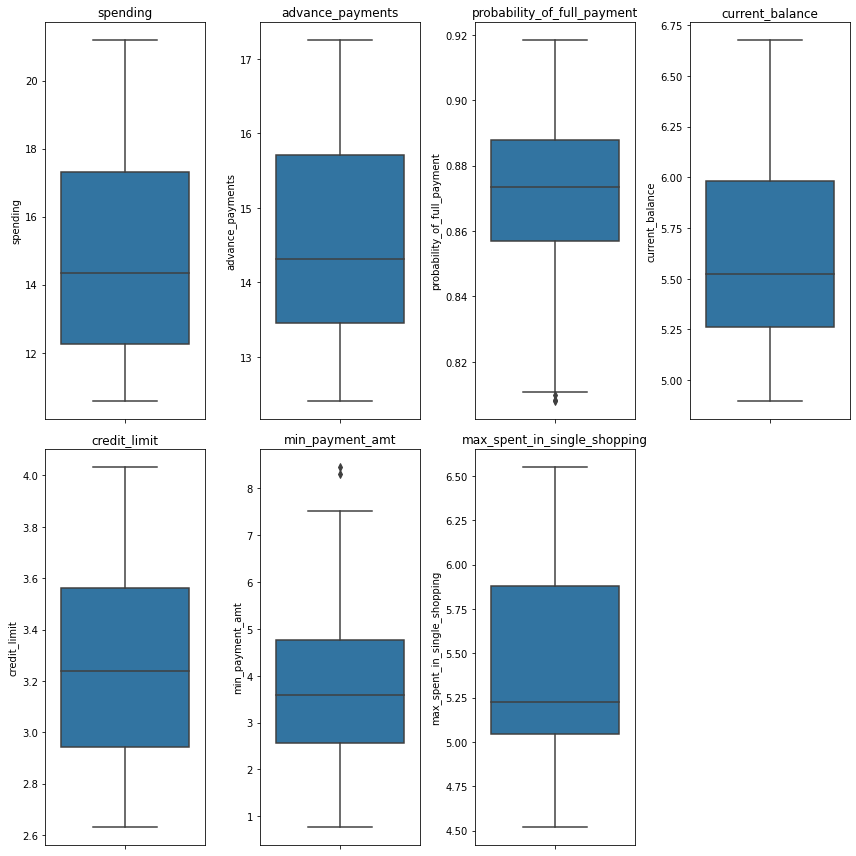

In [9]:
fig=plt.figure(figsize=(12,12))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=df[df.columns[i]]);
    ax.set_title(df.columns[i],color='black')
plt.tight_layout();


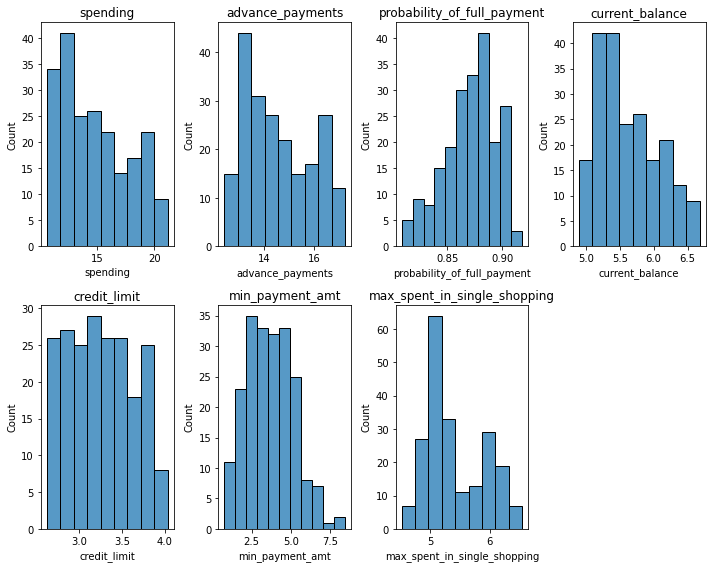

In [10]:
fig = plt.figure(figsize=(10,8))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.histplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='black')
plt.tight_layout();



In [11]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


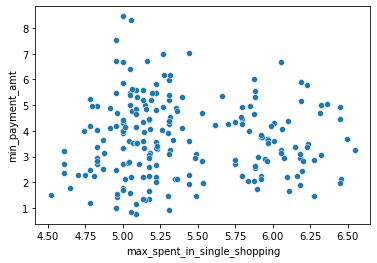

In [12]:
sns.scatterplot(df['max_spent_in_single_shopping'],df['min_payment_amt']);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


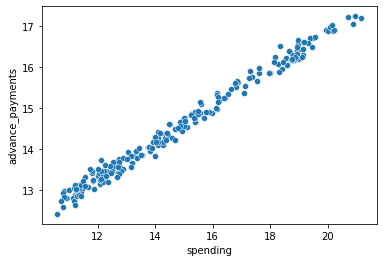

In [13]:
sns.scatterplot(df['spending'],df['advance_payments']);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


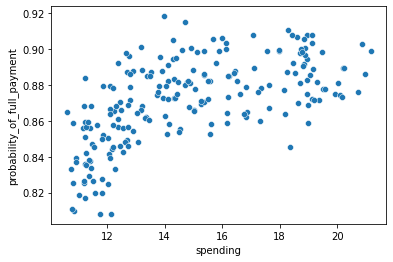

In [14]:
sns.scatterplot(df['spending'],df['probability_of_full_payment']);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


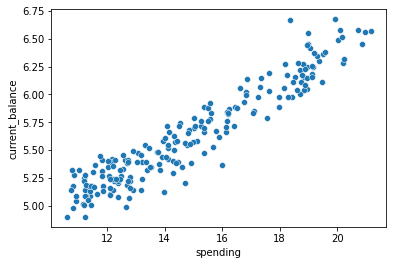

In [15]:
sns.scatterplot(df['spending'],df['current_balance']);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


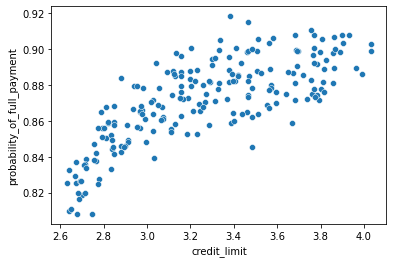

In [16]:
sns.scatterplot(df['credit_limit'],df['probability_of_full_payment']);

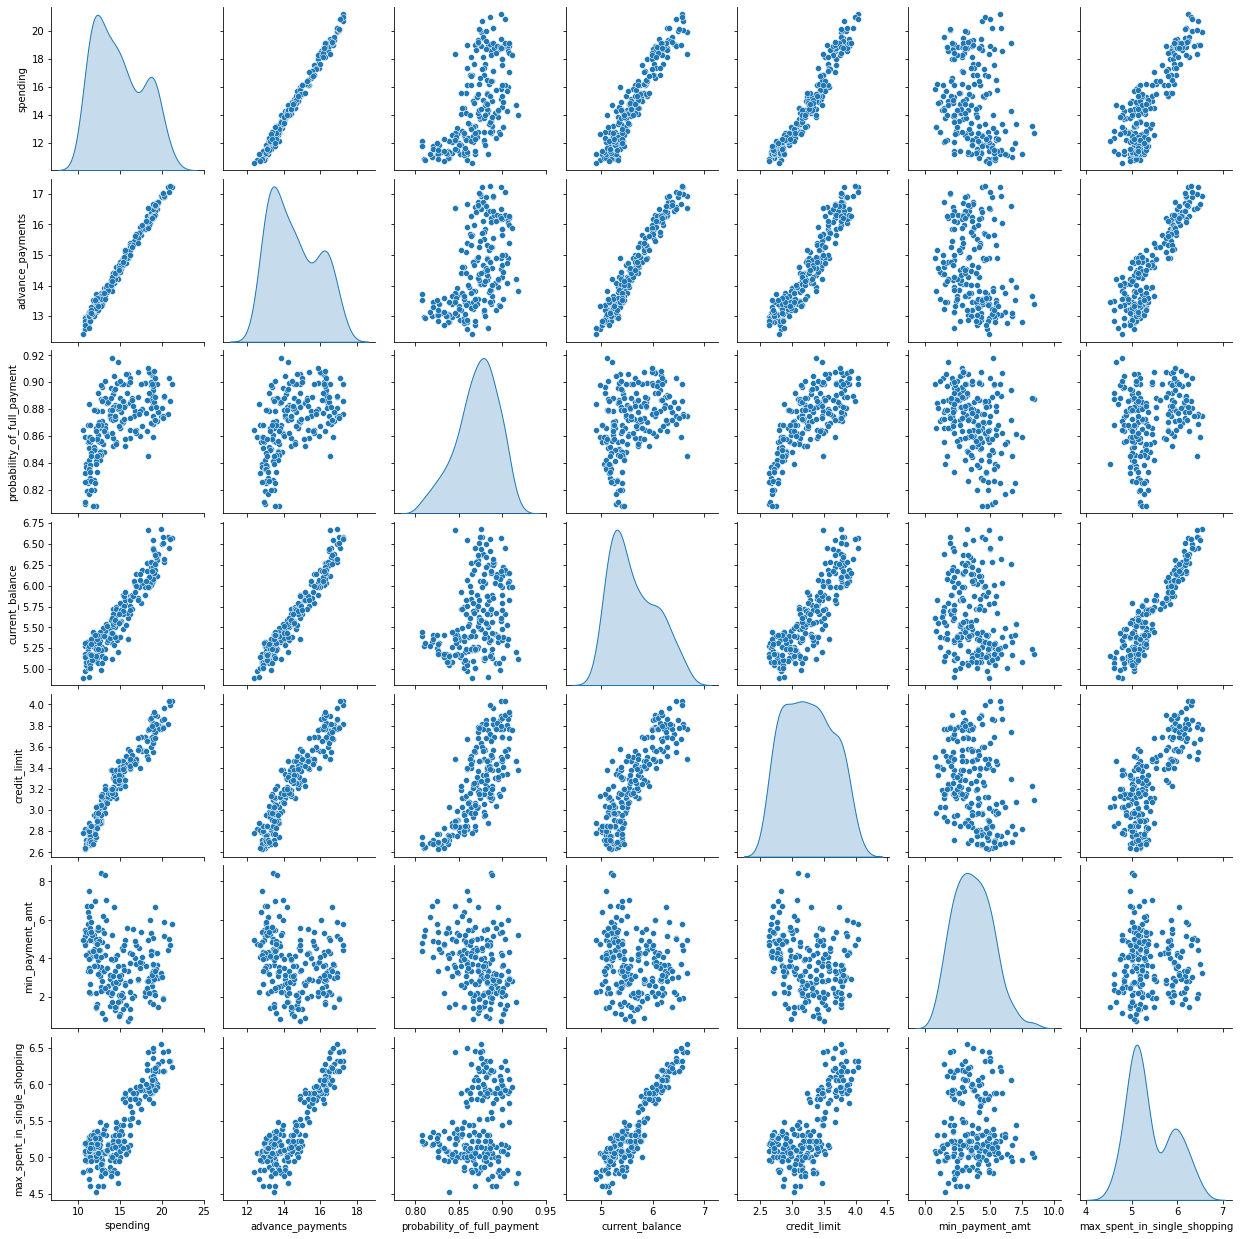

In [17]:
sns.pairplot(df[df.columns],diag_kind='kde')
plt.show()


<AxesSubplot:>

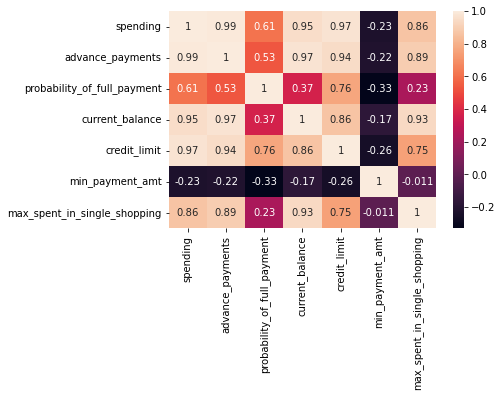

In [18]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [19]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [20]:
from scipy.stats import zscore
scaled_data=df.apply(zscore)
scaled_data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

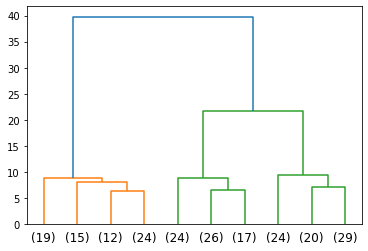

In [21]:
from scipy.cluster.hierarchy import dendrogram,linkage
wardlink= linkage(scaled_data,method='ward')
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters=fcluster(wardlink,18,criterion='distance')

In [24]:
df['clusters']=clusters

In [25]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [26]:
df1=df.drop(['clusters'],axis=1)

In [27]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [28]:
from sklearn.cluster import KMeans

In [29]:
K_means=KMeans(n_clusters=3)

In [30]:
K_means.fit(scaled_data)

C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
K_means.inertia_

430.65897315130053

In [32]:
K_means=KMeans(n_clusters=2)
K_means.fit(scaled_data)

C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [33]:
K_means.inertia_

659.1717544870407

In [34]:
Wss=[]

In [35]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(scaled_data)
    Wss.append(KM.inertia_)

C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

In [36]:
Wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.184612535102,
 326.22891682972653,
 289.77433495935907,
 261.9508039757441,
 239.8425505939866,
 227.10437057464918,
 210.19500172591816]

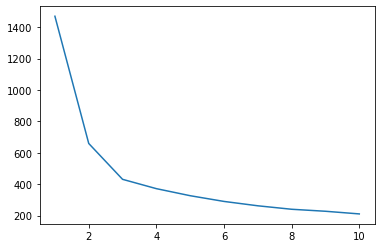

In [37]:
plt.plot(range(1,11),Wss);

In [38]:
K_means=KMeans(n_clusters=3)
K_means.fit(scaled_data)
K_means.labels_

C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1])

In [39]:
labels=K_means.labels_

In [40]:
df1['Clus_kmeans']=labels
df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [41]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [42]:
silhouette_score(scaled_data,labels)

0.40072705527512986

In [43]:
silhouette_samples(scaled_data,labels)

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [44]:
sil_width=silhouette_samples(scaled_data,labels)

In [45]:
df1['Sil_width']=sil_width
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,Sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.362276


In [46]:
silhouette_samples(scaled_data,labels).min()

0.002713089347678376

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [47]:
df1[df1['Clus_kmeans']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
spending,72.0,11.856944,0.714801,10.590000,11.255000,11.825000,12.395000,13.340000
advance_payments,72.0,13.247778,0.355208,12.410000,12.992500,13.250000,13.482500,13.950000
probability_of_full_payment,72.0,0.848253,0.019953,0.808100,0.835000,0.848600,0.861475,0.888300
current_balance,72.0,5.231750,0.141795,4.899000,5.139250,5.225000,5.337250,5.541000
credit_limit,72.0,2.849542,0.138689,2.630000,2.738500,2.836500,2.967000,3.232000
min_payment_amt,72.0,4.742389,1.354711,1.502000,4.032250,4.799000,5.463750,8.456000
max_spent_in_single_shopping,72.0,5.101722,0.184012,4.519000,5.001000,5.089000,5.223500,5.491000
Clus_kmeans,72.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sil_width,72.0,0.397473,0.159526,0.002713,0.314599,0.453462,0.515146,0.587277


In [48]:
df1[df1['Clus_kmeans']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
spending,71.0,14.437887,1.056513,12.080000,13.820000,14.430000,15.260000,16.440000
advance_payments,71.0,14.337746,0.525706,13.150000,14.030000,14.390000,14.760000,15.270000
probability_of_full_payment,71.0,0.881597,0.015502,0.852700,0.871300,0.881900,0.893350,0.918300
current_balance,71.0,5.514577,0.225266,4.984000,5.380000,5.541000,5.689500,5.920000
credit_limit,71.0,3.259225,0.154766,2.936000,3.155000,3.258000,3.378000,3.582000
min_payment_amt,71.0,2.707341,1.176440,0.765100,1.951000,2.640000,3.332000,6.685000
max_spent_in_single_shopping,71.0,5.120803,0.269558,4.605000,4.958500,5.132000,5.263500,5.879000
Clus_kmeans,71.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Sil_width,71.0,0.339816,0.165898,0.005457,0.234095,0.371077,0.479615,0.554103


In [49]:
df1[df1['Clus_kmeans']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
spending,67.0,18.495373,1.277122,15.560000,17.590000,18.750000,19.14500,21.180000
advance_payments,67.0,16.203433,0.546439,14.890000,15.855000,16.230000,16.58000,17.250000
probability_of_full_payment,67.0,0.884210,0.014917,0.845200,0.874650,0.882900,0.89805,0.910800
current_balance,67.0,6.175687,0.237807,5.718000,6.011500,6.153000,6.32800,6.675000
credit_limit,67.0,3.697537,0.166014,3.387000,3.564500,3.719000,3.80800,4.033000
min_payment_amt,67.0,3.632373,1.211052,1.472000,2.848000,3.619000,4.42100,6.682000
max_spent_in_single_shopping,67.0,6.041701,0.229566,5.484000,5.879000,6.009000,6.19250,6.550000
Clus_kmeans,67.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.00000,2.000000
Sil_width,67.0,0.468772,0.153712,0.029792,0.419827,0.523482,0.57434,0.639285


## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



In [50]:
from sklearn.tree import DecisionTreeClassifier

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis). 

In [51]:
df2=pd.read_csv('Downloads/insurance_part2_data (1).csv')

In [52]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [53]:
df2.shape

(3000, 10)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [121]:
df3=df2.drop(['Agency_Code'],axis=1)
df3.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [56]:
df3['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [57]:
for feature in df3.columns: 
    if df3[feature].dtype == 'object': 
        df3[feature] = pd.Categorical(df3[feature]).codes 

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Type          3000 non-null   int8   
 2   Claimed       3000 non-null   int8   
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   int8   
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   int8   
 8   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 108.5 KB


In [59]:
df3.describe()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [60]:
X = df3.drop(['Claimed'], axis=1)
y = df3.pop('Claimed')

In [122]:
X.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0.70,1,7,2.51,2,0
1,36,1,0.00,1,34,20.00,2,0
2,39,1,5.94,1,3,9.90,2,1
3,36,1,0.00,1,4,26.00,1,0
4,33,0,6.30,1,53,18.00,0,0


In [124]:
X.Type.value_counts()

1    1837
0    1163
Name: Type, dtype: int64

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

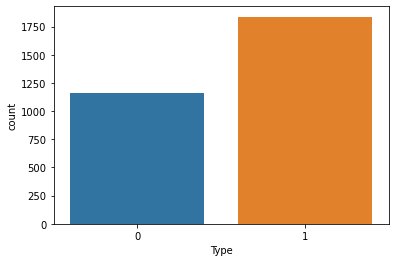

In [125]:
sns.countplot(X.Type)

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


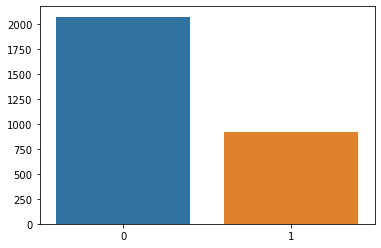

In [62]:
sns.barplot(y.value_counts().index,y.value_counts().values,);
plt.show()


In [63]:
y.value_counts(normalize=1)

0    0.692
1    0.308
Name: Claimed, dtype: float64

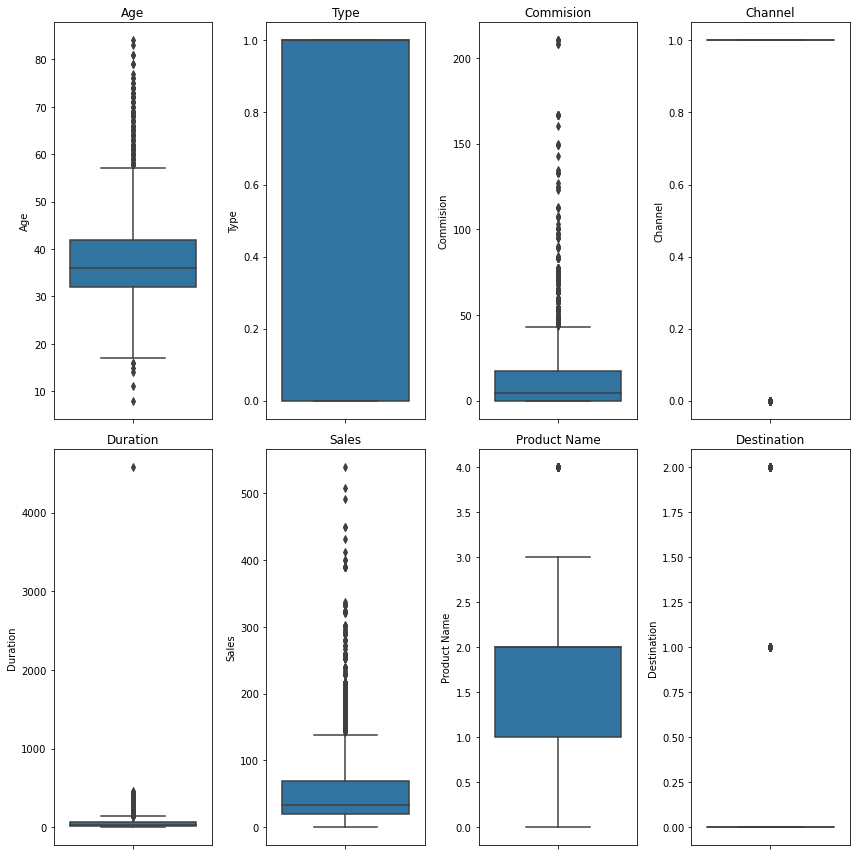

In [64]:
fig=plt.figure(figsize=(12,12))
for i in range(0,len(X.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=X[X.columns[i]]);
    ax.set_title(X.columns[i],color='black')
plt.tight_layout();


In [65]:
X.columns

Index(['Age', 'Type', 'Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

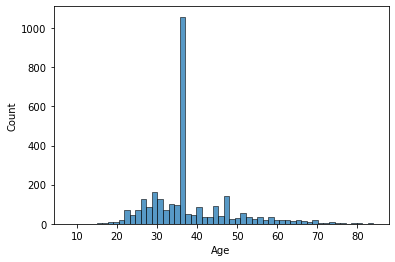

In [66]:
sns.histplot(X.Age);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


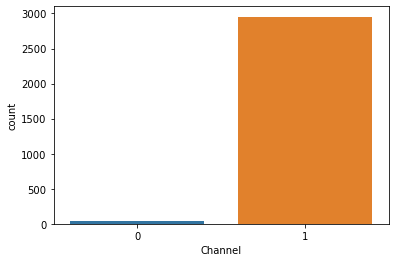

In [67]:
sns.countplot(X.Channel);

In [120]:
X.Channel.value_counts(normalize=True)

1    0.984667
0    0.015333
Name: Channel, dtype: float64

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


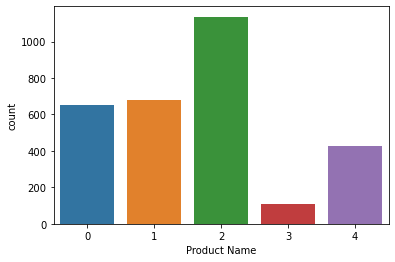

In [68]:
sns.countplot(X['Product Name']);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


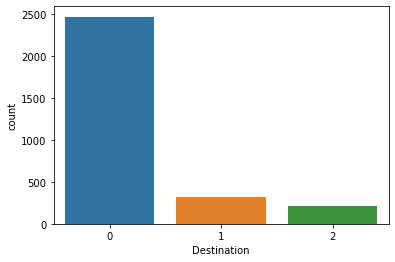

In [126]:
sns.countplot(X['Destination']);

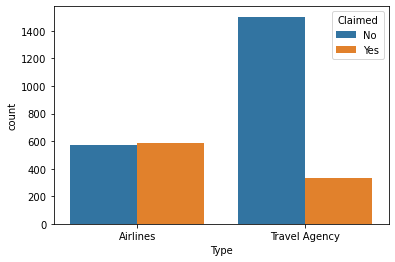

In [129]:
sns.countplot(df3.Type,hue=df3['Claimed']);

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


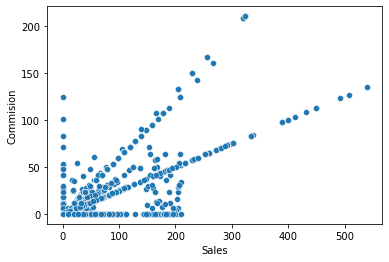

In [70]:
sns.scatterplot(X.Sales,X.Commision);

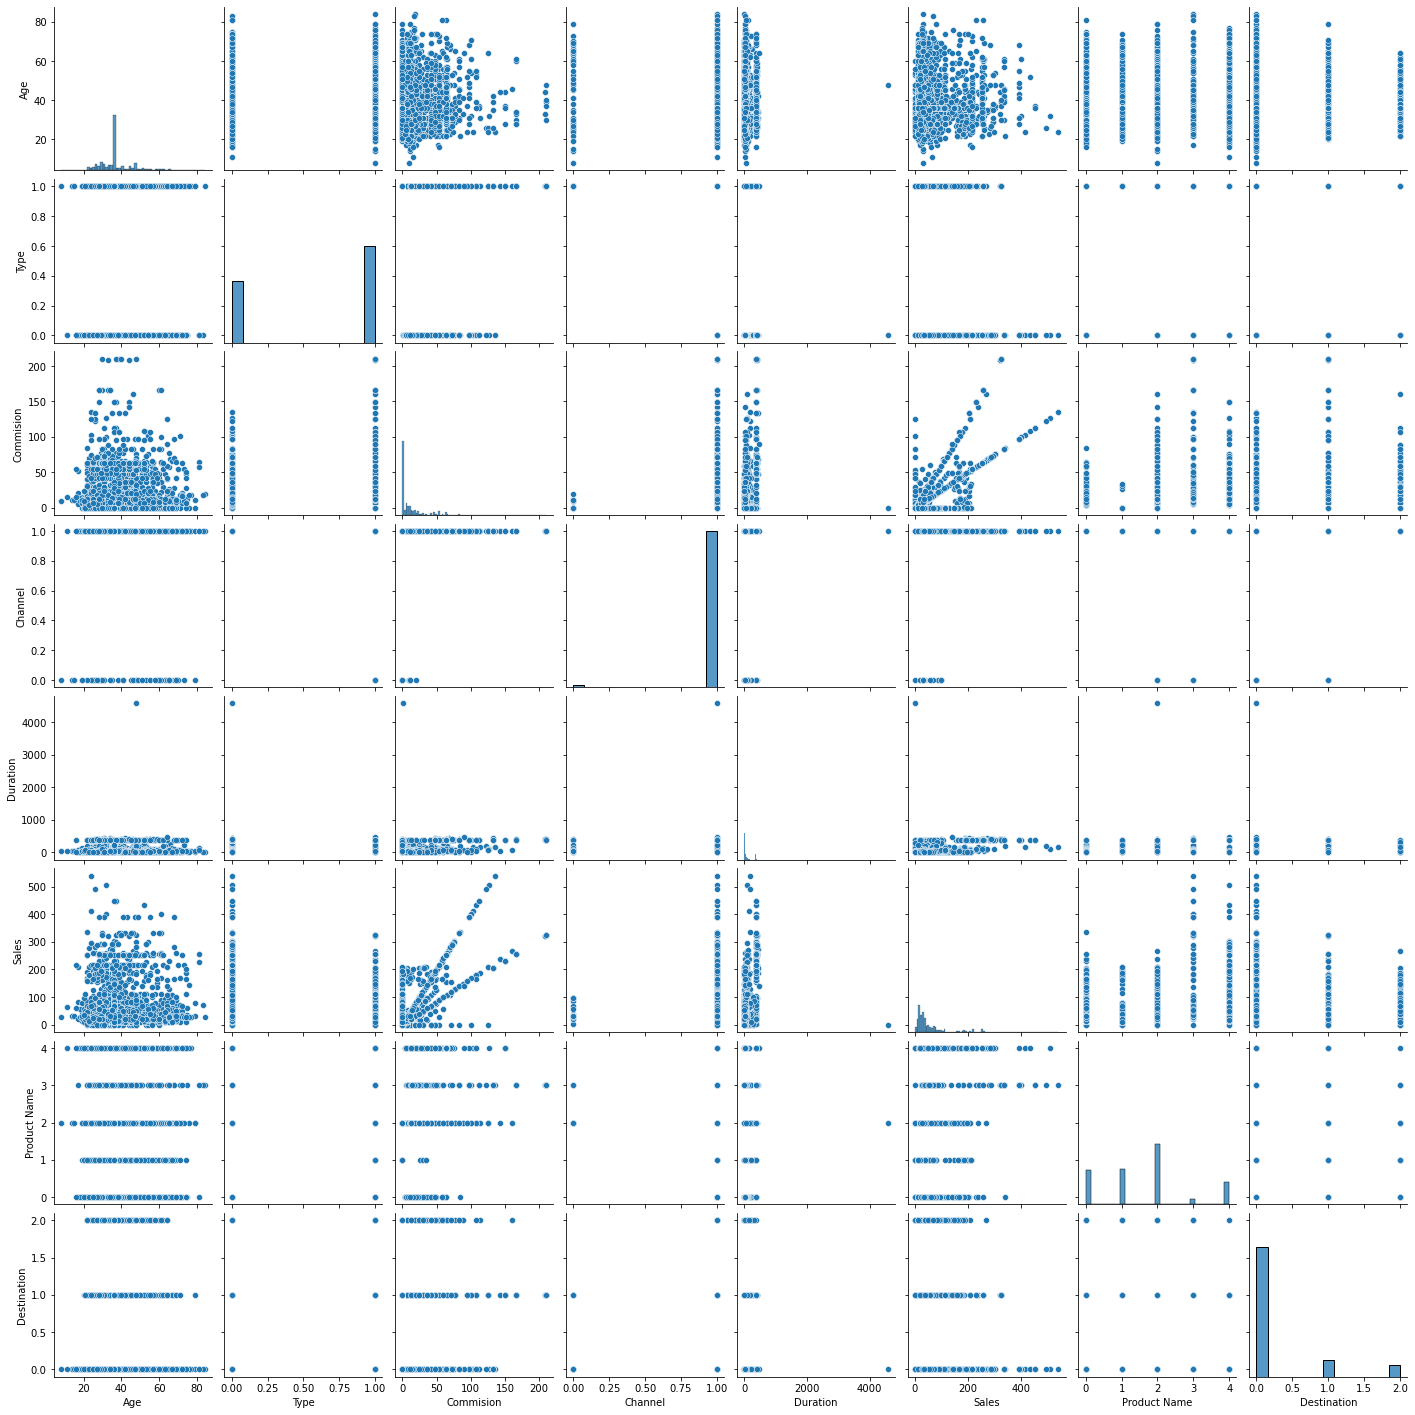

In [71]:
sns.pairplot(X);

<AxesSubplot:>

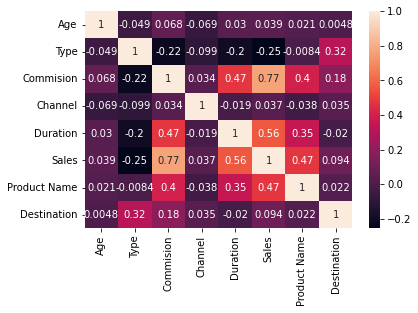

In [72]:
corr=X.corr()
sns.heatmap(corr,annot=True)

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

​

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [74]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [75]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [76]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('d:\insurance_claim.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Insurance_Tree_File.close()

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [11,13,15,17],
    'min_samples_leaf': [80,90,100],
    'min_samples_split': [240,270,300]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [78]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [11, 13, 15, 17],
                         'min_samples_leaf': [80, 90, 100],
                         'min_samples_split': [240, 270, 300]})

In [79]:
grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 80, 'min_samples_split': 270}

In [80]:
best_grid = grid_search.best_estimator_

In [81]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1471
           1       0.64      0.59      0.61       629

    accuracy                           0.78      2100
   macro avg       0.74      0.72      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [84]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       605
           1       0.69      0.50      0.58       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.71       900
weighted avg       0.75      0.76      0.75       900



###  2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

AUC: 0.818


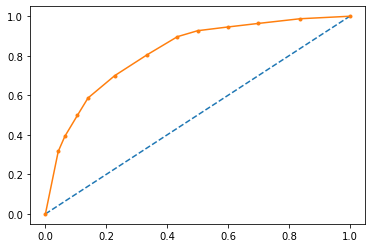

In [85]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.790


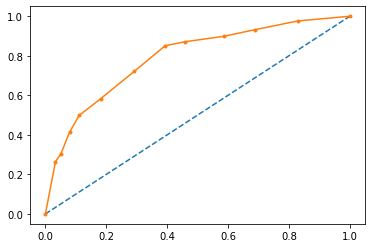

In [86]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(train_labels, ytrain_predict)

array([[1265,  206],
       [ 260,  369]], dtype=int64)

In [89]:
confusion_matrix(test_labels, ytest_predict)

array([[538,  67],
       [148, 147]], dtype=int64)

In [90]:
grid_search.score(X_train,train_labels)

0.7780952380952381

In [91]:
grid_search.score(X_test,test_labels)

0.7611111111111111

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 15],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [95]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [96]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [97]:
best_grid = grid_search.best_estimator_

In [98]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
confusion_matrix(train_labels,ytrain_predict)

array([[1349,  122],
       [ 328,  301]], dtype=int64)

In [101]:
confusion_matrix(test_labels,ytest_predict)

array([[564,  41],
       [187, 108]], dtype=int64)

In [102]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1471
           1       0.71      0.48      0.57       629

    accuracy                           0.79      2100
   macro avg       0.76      0.70      0.71      2100
weighted avg       0.78      0.79      0.77      2100



In [103]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       605
           1       0.72      0.37      0.49       295

    accuracy                           0.75       900
   macro avg       0.74      0.65      0.66       900
weighted avg       0.74      0.75      0.72       900



AUC: 0.828


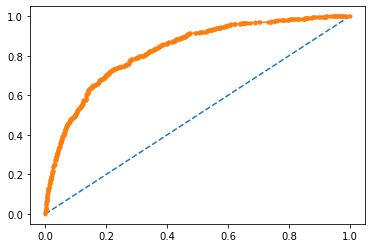

In [104]:
probs2 = best_grid.predict_proba(X_train)
probs2 = probs2[:, 1]
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(train_labels, probs2)
print('AUC: %.3f' % auc2)
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(train_labels, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr2, tpr2, marker='.')
plt.show()

AUC: 0.790


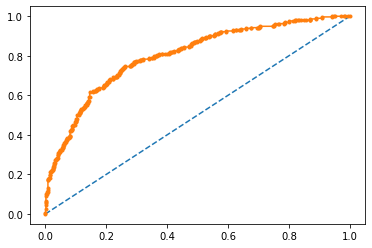

In [105]:
probs2 = best_grid.predict_proba(X_test)
probs2 = probs2[:, 1]
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc2)
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds = roc_curve(test_labels, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr2, tpr2, marker='.')
plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [107]:
from sklearn.neural_network import MLPClassifier

In [108]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [109]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [110]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [111]:
best_grid = grid_search.best_estimator_

In [112]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [113]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1471
           1       0.74      0.45      0.56       629

    accuracy                           0.79      2100
   macro avg       0.77      0.69      0.71      2100
weighted avg       0.78      0.79      0.77      2100



In [114]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       605
           1       0.73      0.36      0.48       295

    accuracy                           0.75       900
   macro avg       0.74      0.65      0.66       900
weighted avg       0.74      0.75      0.72       900



In [115]:
confusion_matrix(train_labels,ytrain_predict)

array([[1371,  100],
       [ 345,  284]], dtype=int64)

In [116]:
confusion_matrix(test_labels,ytest_predict)

array([[565,  40],
       [189, 106]], dtype=int64)

AUC: 1.000


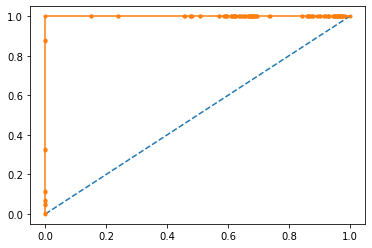

In [117]:
probs = grid_search.predict_proba(X_trains)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytrain_predict, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytrain_predict, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 1.000


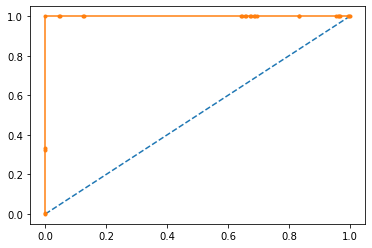

In [118]:
probs = grid_search.predict_proba(X_tests)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest_predict, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest_predict, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()